In [5]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt # Detta bibliotek ritar graferna

con = duckdb.connect('sakila.duckdb', read_only=True)

IOException: IO Error: Cannot open database "c:\users\erfan\lab1-sql\sakila.duckdb" in read-only mode: database does not exist

In [ ]:
%pip install matplotlib # AI Generated Code.

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [ ]:
Task_1a = """
SELECT 
    title, 
    length
FROM 
    film
WHERE 
    length > 180
ORDER BY 
    length DESC;
"""
# AI Generated Code.
df_long_movies = con.sql(Task_1a).df()
display(df_long_movies)

,title,length
0,WORST BANGER,185
1,CHICAGO NORTH,185
2,CONTROL ANTHEM,185
3,DARN FORRESTER,185
4,SWEET BROTHERHOOD,185
5,GANGS PRIDE,185
6,HOME PITY,185
7,SOLDIERS EVOLUTION,185
8,POND SEATTLE,185
9,MUSCLE BRIGHT,185


In [ ]:
Task_1b = """
SELECT 
    title, 
    rating, 
    length, 
    description
FROM 
    film
WHERE 
    title LIKE '%LOVE%'
ORDER BY 
    title;
"""
df_love_movies = con.sql(Task_1b).df()
display(df_love_movies)

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


In [ ]:
task_1c = """
SELECT 
    MIN(length)    AS shortest_movie,
    AVG(length)    AS average_length,
    MEDIAN(length) AS median_length,
    MAX(length)    AS longest_movie
FROM 
    film;
"""

df_stats = con.sql(task_1c).df()
display(df_stats)

,shortest_movie,average_length,median_length,longest_movie
0,46,115.272,114.0,185


In [ ]:
task_1d = """
SELECT 
    title, 
    rental_rate,
    rental_duration, 
    (rental_rate / rental_duration) AS cost_per_day
FROM 
    film 
ORDER BY 
    cost_per_day DESC
LIMIT 10;
"""

df_expensive_movies = con.sql(task_1d).df()
display(df_expensive_movies)

,title,rental_rate,rental_duration,cost_per_day
0,AMERICAN CIRCUS,4.99,3,1.663333
1,BACKLASH UNDEFEATED,4.99,3,1.663333
2,BILKO ANONYMOUS,4.99,3,1.663333
3,BEAST HUNCHBACK,4.99,3,1.663333
4,CARIBBEAN LIBERTY,4.99,3,1.663333
5,AUTUMN CROW,4.99,3,1.663333
6,CASPER DRAGONFLY,4.99,3,1.663333
7,ACE GOLDFINGER,4.99,3,1.663333
8,BEHAVIOR RUNAWAY,4.99,3,1.663333
9,CASUALTIES ENCINO,4.99,3,1.663333


In [ ]:
task_1e = """
SELECT 
    a.actor_id,
    a.first_name,
    a.last_name,
    COUNT(fa.film_id) AS number_of_movies
FROM
    actor AS a
    JOIN 
    film_actor AS fa ON a.actor_id = fa.actor_id
GROUP BY
    a.actor_id, 
    a.first_name,
    a.last_name
ORDER BY 
    number_of_movies DESC
    LIMIT 10;
"""
df_top_actors = con.sql(task_1e).df()
display(df_top_actors)

,actor_id,first_name,last_name,number_of_movies
0,107.0,GINA,DEGENERES,42
1,102.0,WALTER,TORN,41
2,198.0,MARY,KEITEL,40
3,181.0,MATTHEW,CARREY,39
4,23.0,SANDRA,KILMER,37
5,81.0,SCARLETT,DAMON,36
6,158.0,VIVIEN,BASINGER,35
7,37.0,VAL,BOLGER,35
8,60.0,HENRY,BERRY,35
9,144.0,ANGELA,WITHERSPOON,35


How many movies are there for each rating category?

In [ ]:
Task_1_f_1 = """
SELECT 
    rating,
    count(*) AS number_of_movies
FROM    
    film
GROUP BY
    rating
ORDER BY
    number_of_movies DESC;
"""
display(con.sql(Task_1_f_1).df())


,rating,number_of_movies
0,PG-13,223
1,NC-17,210
2,R,195
3,PG,194
4,G,178


Which are the top 5 longest movies suitable for General Audiences (G-rated)?

In [ ]:
Task_1_f_2 = """
SELECT
    title,
    length
FROM
    film
WHERE
    rating = 'G'
ORDER BY
    length DESC
LIMIT 5;
"""
display(con.sql(Task_1_f_2).df())


,title,length
0,MUSCLE BRIGHT,185
1,CONTROL ANTHEM,185
2,DARN FORRESTER,185
3,MOONWALKER FOOL,184
4,CATCH AMISTAD,183


How many customers are active (1) vs inactive (0)?

In [ ]:
Task_1_f_3 = """
SELECT 
    CASE 
        WHEN active = 1 THEN 'Active'
        ELSE 'Inactive'
    END AS customer_status,
    COUNT(*) AS number_of_customers
FROM 
    customer
GROUP BY 
    active;
"""
display(con.sql(Task_1_f_3).df())


,customer_status,number_of_customers
0,Inactive,15
1,Active,584


What is the total replacement cost of our inventory, grouped by film rating?


In [ ]:
TASK_1_f_4 = """ 
SELECT
    rating,
    SUM(replacement_cost) AS total_replacement_cost 
FROM
    film
GROUP BY
    rating
    ORDER BY
    total_replacement_cost DESC;
    """
display(con.sql(TASK_1_f_4).df())

,rating,total_replacement_cost
0,PG-13,4549.77
1,NC-17,4228.90
2,R,3945.05
3,PG,3678.06
4,G,3582.22


,customer_name,total_spend
0,KARL SEAL,221.55
1,ELEANOR HUNT,216.54
2,CLARA SHAW,195.58
3,RHONDA KENNEDY,194.61
4,MARION SNYDER,194.61


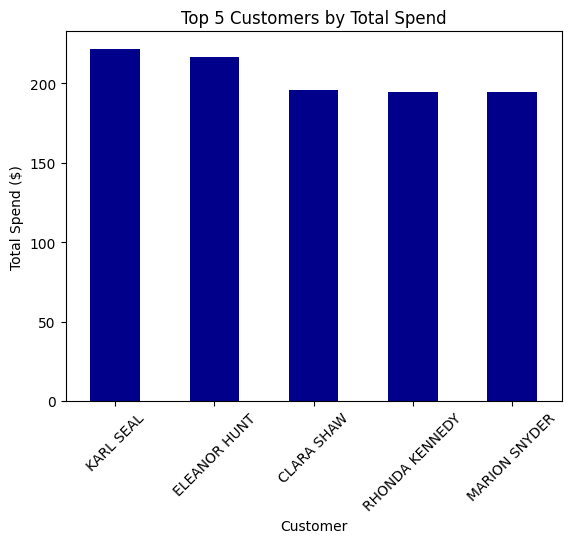

In [ ]:
Task_2_a = """
SELECT 
    c.first_name || ' ' || c.last_name AS customer_name,
    SUM(p.amount) AS total_spend
FROM 
    customer AS c
JOIN 
    payment AS p ON c.customer_id = p.customer_id
GROUP BY 
    customer_name
ORDER BY 
    total_spend DESC
LIMIT 5;
"""

# AI Generated Code.
df_top_customers = con.sql(Task_2_a).df()
display(df_top_customers)

# AI Generated Code.
df_top_customers.plot(kind='bar', x='customer_name', y='total_spend', color= 'darkblue', legend=False)
# AI Generated Code.
plt.title("Top 5 Customers by Total Spend")
plt.ylabel("Total Spend ($)")
plt.xlabel("Customer")
plt.xticks(rotation=45)
plt.show()

,category_name,total_revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58


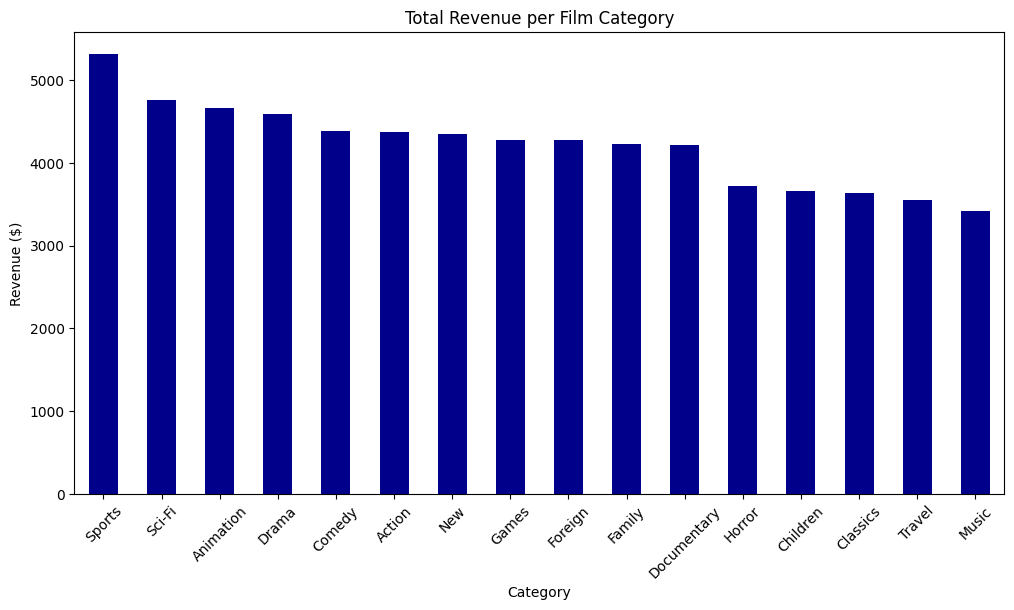

In [ ]:
Task_2_b = """
SELECT 
    c.name AS category_name,
    SUM(p.amount) AS total_revenue
FROM 
    category AS c
JOIN film_category AS fc ON c.category_id = fc.category_id
JOIN film AS f ON fc.film_id = f.film_id
JOIN inventory AS i ON f.film_id = i.film_id
JOIN rental AS r ON i.inventory_id = r.inventory_id
JOIN payment AS p ON r.rental_id = p.rental_id
GROUP BY 
    c.name
ORDER BY 
    total_revenue DESC;
"""
df_category_revenue = con.sql(Task_2_b).df()

display(df_category_revenue.head())

# AI Generated Code.
df_category_revenue.plot(kind='bar', x='category_name', y='total_revenue', color='darkblue', figsize=(12, 6), legend=False)

# AI Generated Code.
plt.title("Total Revenue per Film Category")
plt.ylabel("Revenue ($)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# AI Generated Code (All).

import duckdb
import os

# 1. Ta bort gammal fil
if os.path.exists('dashboard/sakila.duckdb'):
    os.remove('dashboard/sakila.duckdb')

# 2. Skapa ny koppling
con = duckdb.connect('dashboard/sakila.duckdb')

# 3. Ladda SQLite
con.sql("INSTALL sqlite; LOAD sqlite;")
con.sql("ATTACH 'sakila.db' AS source_db (TYPE SQLITE);")

# 4. Kopiera tabellerna vi behöver (manuellt)
print("Kopierar tabeller...")
con.sql("CREATE TABLE actor AS SELECT * FROM source_db.actor")
con.sql("CREATE TABLE film AS SELECT * FROM source_db.film")
con.sql("CREATE TABLE customer AS SELECT * FROM source_db.customer")
con.sql("CREATE TABLE payment AS SELECT * FROM source_db.payment")
con.sql("CREATE TABLE rental AS SELECT * FROM source_db.rental")
con.sql("CREATE TABLE category AS SELECT * FROM source_db.category")
con.sql("CREATE TABLE film_category AS SELECT * FROM source_db.film_category")
con.sql("CREATE TABLE inventory AS SELECT * FROM source_db.inventory")

print("✅ KLART! Databasen är skapad med alla viktiga tabeller.")
con.close()

Kopierar tabeller...
✅ KLART! Databasen är skapad med alla viktiga tabeller.


In [ ]:
# AI Generated Code (All).

import duckdb
import os

# Sökvägar
source_sqlite = 'sakila.db'  # Din originalfil
dest_duckdb = 'dashboard/sources/sakila/sakila.duckdb' # Där Evidence letar nu

# 1. Kolla att källan finns
if not os.path.exists(source_sqlite):
    print(f"❌ FEL: Hittar inte {source_sqlite}! Ligger den i huvudmappen?")
else:
    print(f"✅ Hittade källan: {source_sqlite}")

    # 2. Ta bort den gamla (trasiga) filen i dashboarden
    if os.path.exists(dest_duckdb):
        try:
            os.remove(dest_duckdb)
            print("🗑️ Tog bort den gamla trasiga filen.")
        except PermissionError:
            print("❌ KUNDE INTE TA BORT FILEN. Stäng av Evidence-servern i terminalen!")

    # 3. Skapa ny databas och kopiera data
    try:
        con = duckdb.connect(dest_duckdb)
        con.sql("INSTALL sqlite; LOAD sqlite;")
        con.sql(f"ATTACH '{source_sqlite}' AS source_db (TYPE SQLITE);")

        # Kopiera tabellerna manuellt
        tables = ['actor', 'film', 'customer', 'payment', 'rental', 'category', 'inventory']
        for t in tables:
            con.sql(f"CREATE TABLE {t} AS SELECT * FROM source_db.{t}")
            print(f"📦 Kopierade tabell: {t}")

        con.close()
        
        # 4. Kolla storleken på den nya filen
        size = os.path.getsize(dest_duckdb) / (1024 * 1024) # Storlek i MB
        print(f"\n✅ KLART! Ny fil skapad: {dest_duckdb}")
        print(f"📊 Filstorlek: {size:.2f} MB (Ska vara ca 5-6 MB)")
        
    except Exception as e:
        print(f"❌ Något gick fel: {e}")

✅ Hittade källan: sakila.db
🗑️ Tog bort den gamla trasiga filen.
📦 Kopierade tabell: actor
📦 Kopierade tabell: film
📦 Kopierade tabell: customer
📦 Kopierade tabell: payment
📦 Kopierade tabell: rental
📦 Kopierade tabell: category
📦 Kopierade tabell: inventory

✅ KLART! Ny fil skapad: dashboard/sources/sakila/sakila.duckdb
📊 Filstorlek: 2.26 MB (Ska vara ca 5-6 MB)


In [ ]:
# AI Generated Code (All).

import duckdb
import os

# Mappen där Evidence letar efter data
output_dir = 'dashboard/sources/sakila'

# Skapa mappen om den inte finns
os.makedirs(output_dir, exist_ok=True)

# Koppla till din SQLite-fil (källan)
con = duckdb.connect('sakila.db') # Eller 'sakila.duckdb' om du föredrar

# Lista på tabeller vi vill ha
tables = ['customer', 'payment', 'film', 'category', 'film_category', 'inventory', 'rental']

print(f"Exporterar till {output_dir}...")

for t in tables:
    # Exportera varje tabell till en CSV-fil
    con.sql(f"COPY (SELECT * FROM {t}) TO '{output_dir}/{t}.csv' (HEADER, DELIMITER ',')")
    print(f"✅ Skapade {t}.csv")

con.close()

Exporterar till dashboard/sources/sakila...
✅ Skapade customer.csv
✅ Skapade payment.csv
✅ Skapade film.csv
✅ Skapade category.csv
✅ Skapade film_category.csv
✅ Skapade inventory.csv
✅ Skapade rental.csv


In [ ]:
# AI Generated Code (All).


import duckdb

con = duckdb.connect('sakila.db')
con.sql("COPY (SELECT * FROM actor) TO 'dashboard/sources/sakila/actor.csv' (HEADER, DELIMITER ',')")
con.close()
print("✅ actor.csv har skapats!")

✅ actor.csv har skapats!
